<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Taller 1 - Ciencia de datos aplicada

MINE-4101: Applied Data Science Taller 1  
Universidad de los Andes  
  
**Dataset:** Hotel Booking Modified

**Integrantes**

  - Carlos Andrés García  
  - Cristian René Méndez G  
   
Last update: Sept, 2025      
*Notebook auto-contenido que implementa todos los requisitos del taller.

## 1.1 Import and configure libraries

In [36]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
confusion_matrix, classification_report, roc_curve
)

In [37]:
# libraries versions

print('---Versions---')
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('sklearn', sklearn.__version__)

---Versions---
Python 3.13.7
NumPy 2.2.6
Pandas 2.3.2
matplotlib 3.10.6
Seaborn 0.13.2
sklearn 1.7.2


In [38]:
# Pandas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [39]:
# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [40]:
OUTPUT_DIR='./data/Output'

## 1.2. Load data




In [41]:
# Loading the CSV file as a dataframe
booking_df = pd.read_csv('./data/hotel_bookings_modified.csv')

C:\Users\pinka\AppData\Local\Temp\ipykernel_868\2621617294.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  booking_df = pd.read_csv('./data/hotel_bookings_modified.csv')


# 2.Initial understanding of data

In [42]:
# dataframe dimensions
booking_df.shape

(58895, 33)

In [43]:
#show the name of the columns
booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

In [44]:
# data types
print(booking_df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [45]:
# statistical summary for numerical variables
print('Statistical summary:')
booking_df.describe().T

Statistical summary:


,count,mean,std,min,25%,50%,75%,max
is_canceled,58895.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
lead_time,58895.00,100.05,101.16,0.00,17.00,69.00,157.00,737.00
arrival_date_year,58307.00,2205.52,1837.39,2015.00,2016.00,2016.00,2016.00,20016.00
arrival_date_week_number,58895.00,27.84,13.35,1.00,17.00,29.00,38.00,53.00
arrival_date_day_of_month,58895.00,15.77,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,58895.00,1.06,1.09,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,58895.00,2.85,2.24,0.00,1.00,2.00,4.00,50.00
adults,58895.00,1.97,2.94,-1.00,2.00,2.00,2.00,100.00
children,58891.00,0.11,0.42,0.00,0.00,0.00,0.00,10.00
babies,58895.00,0.14,3.12,-1.00,0.00,0.00,0.00,100.00


In [46]:
# summary for categorical variables
print('Unique values per categorical variable (top 10):')
cat_cols = booking_df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
  print(f"\n---\n {c} (nunique={booking_df[c].nunique()}):\n", booking_df[c].value_counts().head(10))



Unique values per categorical variable (top 10):

---
 hotel (nunique=2):
 hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: int64

---
 arrival_date_month (nunique=12):
 arrival_date_month
August       7715
September    6712
July         6177
October      6040
May          5283
April        5185
June         4725
March        4492
February     3830
December     3121
Name: count, dtype: int64

---
 meal (nunique=5):
 meal
BB           45060
HB           10096
SC            1780
Undefined     1169
FB             790
Name: count, dtype: int64

---
 country (nunique=141):
 country
PRT    27559
GBR     7595
ESP     5275
FRA     3037
IRL     2371
DEU     2022
ITA     1290
CN       807
NLD      748
BEL      733
Name: count, dtype: int64

---
 market_segment (nunique=8):
 market_segment
Online TA        25742
Offline TA/TO    12455
Groups           10399
Direct            7400
Corporate         2621
Complementary      254
Aviation            22
Undefined            2
Name:

In [47]:
# Showing the top 5 rows
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN


 --------------------------
## 2.1. Top 5 most important attributes

We propose these 5 attributes based on the following criteria:

- **lead_time:** Number of days that elapsed between the entering
date of the booking into the PMS and the arrival
date (important for cancellations and scheduling)
- **is_canceled:** Target variable, exercise objective: reduce cancellations
- **hotel:** Impact of hotel type (City vs. Resort). A different strategy could be proposed for each type
- **stays_in_week_nights / stays_in_weekend_nights:** Length of stay
- **adr:** Average daily rate to see the influence on demand and cancellations.

## 2.1. Univariate analysis

In [48]:
selected = ['lead_time', 'is_canceled', 'hotel', 'stays_in_week_nights', 'adr']
print('Attributes selected for univariate analysis:\n', selected)

Attributes selected for univariate analysis:
 ['lead_time', 'is_canceled', 'hotel', 'stays_in_week_nights', 'adr']


### 2.1.1. Lead time

#### 2.1.1.1 Histogram

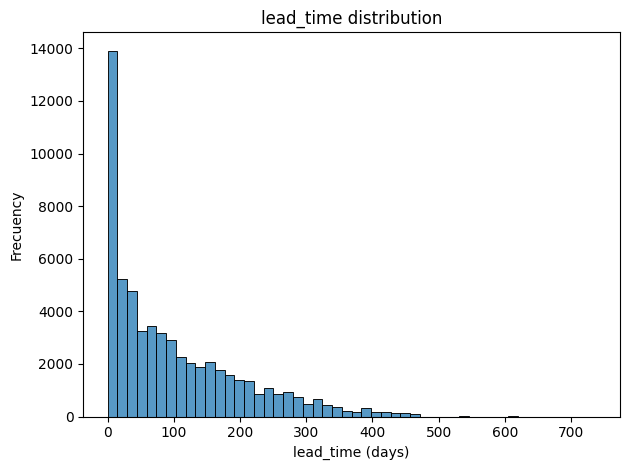

In [49]:
# 4.1 lead_time
plt.figure()
sns.histplot(booking_df['lead_time'].dropna(), bins=50, kde=False)
plt.title('lead_time distribution')
plt.xlabel('lead_time (days)')
plt.ylabel('Frecuency')
plt.tight_layout()
plt.savefig (os.path.join(OUTPUT_DIR, 'hist_lead_time.png'))

In [50]:
# Let's make some calculations for determining an outlier threshold
q1 = booking_df["lead_time"].quantile(0.25)
q3 = booking_df["lead_time"].quantile(0.75)
print(q3)
iqr = q3 - q1

157.0


[]

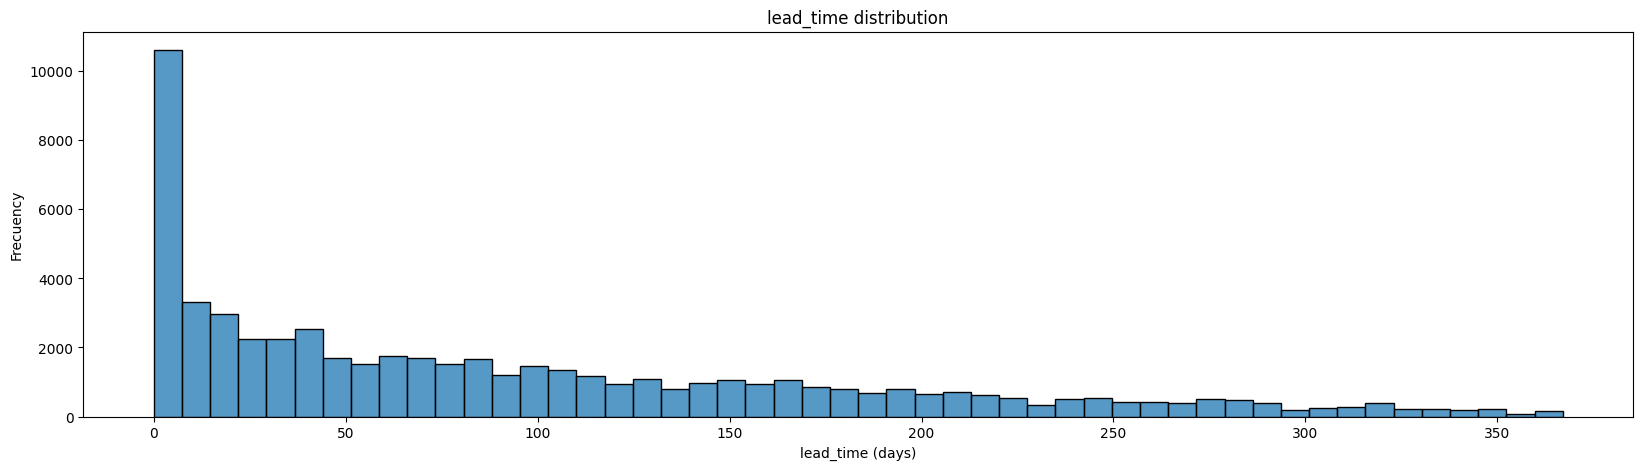

In [51]:
# lead_time in interquartile q1-q3 range
plt.figure(figsize=(20, 5))
sns.histplot(booking_df.loc[booking_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"], bins=50)
plt.title('lead_time distribution')
plt.xlabel('lead_time (days)')
plt.ylabel('Frecuency')
plt.plot()

####2.1.1.2 Boxplot

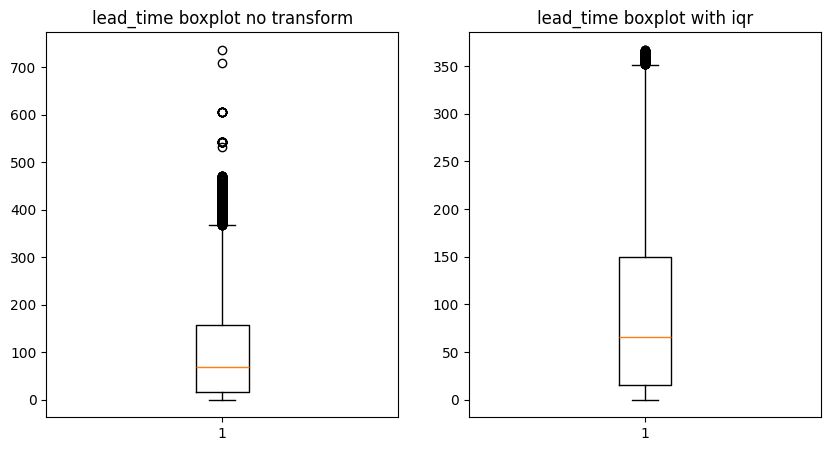

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [52]:
# lead_time in interquartile q1-q3 range
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure()
axes[0].boxplot(x=booking_df['lead_time'])
axes[0].set_title('lead_time boxplot no transform')
plt.savefig(os.path.join(OUTPUT_DIR,'box_lead_time_1.png'))

plt.figure()
axes[1].boxplot(booking_df.loc[booking_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"])
axes[1].set_title('lead_time boxplot with iqr')
plt.savefig(os.path.join(OUTPUT_DIR,'box_lead_time_2.png'))



### 2.1.2 is_canceled (target)

#### 2.1.2.1 Countplot

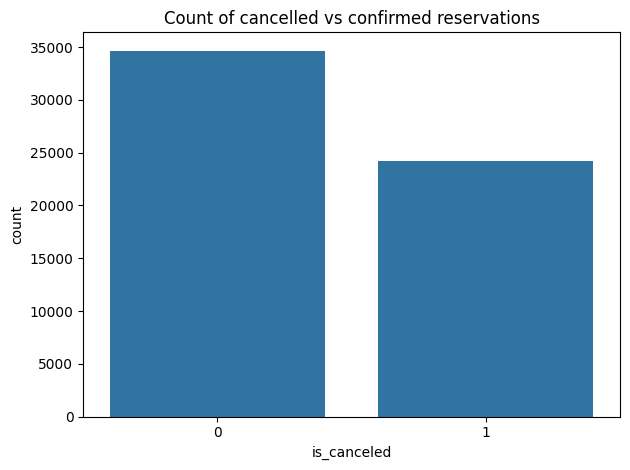

In [53]:
# is_canceled (target)
plt.figure()
sns.countplot(x='is_canceled', data=booking_df)
plt.title('Count of cancelled vs confirmed reservations')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'count_is_canceled.png'))


####2.1.2.2 Cancelation rate

In [54]:
# cancelation Rate
cancel_rate = booking_df['is_canceled'].mean()
print(f"Cancelation rate: {cancel_rate:.3f}")

Cancelation rate: 0.411


### 2.1.3 hotel

#### 2.1.3.1 Countplot

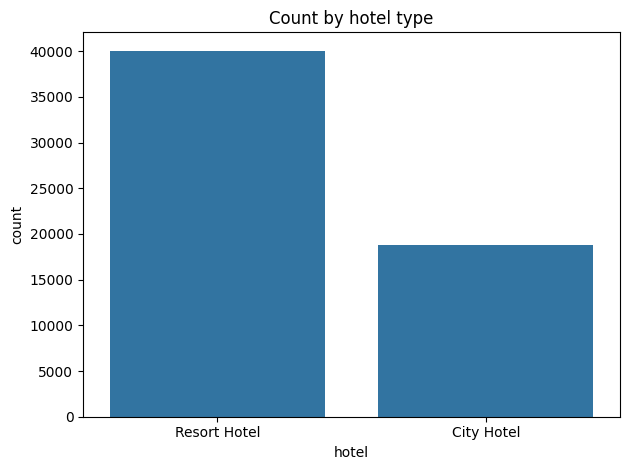

In [55]:
#hotel
plt.figure()
sns.countplot(x='hotel', data=booking_df)
plt.title('Count by hotel type')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'count_hotel.png'))

###2.1.4 stay in week nights

#### 2.1.4.1 histogram

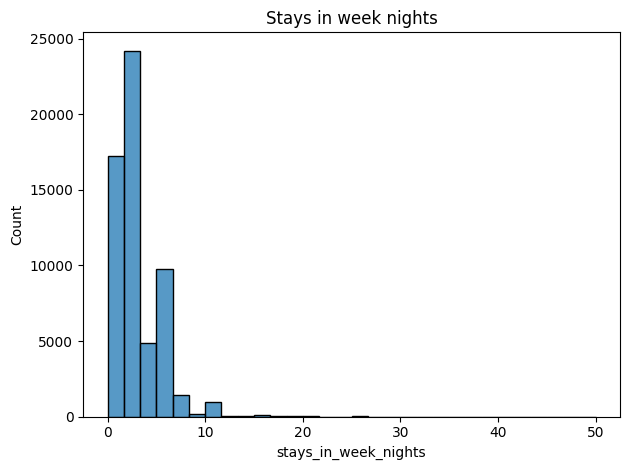

In [56]:
# stays_in_week_nights
plt.figure()
sns.histplot(booking_df['stays_in_week_nights'].dropna(), bins=30)
plt.title('Stays in week nights')
plt.xlabel('stays_in_week_nights')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'hist_stays_week.png'))

### 2.1.4 average daily rate (adr)

#### 2.1.4.1 Histogram

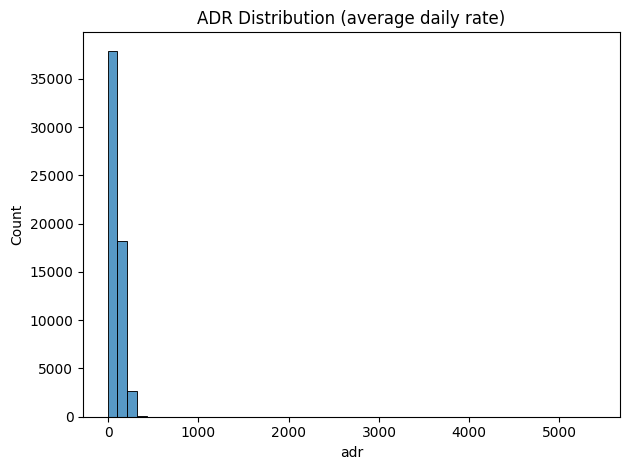

In [57]:
# adr histogram
plt.figure()
sns.histplot(booking_df['adr'].replace([np.inf, -np.inf], np.nan).dropna(), bins=50)
plt.title('ADR Distribution (average daily rate)')
plt.xlabel('adr')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR,'hist_adr.png'))

In [58]:
# # Guardar algunas estadísticas descriptivas
stats = booking_df[selected].describe(include='all').T
stats.to_csv(os.path.join(OUTPUT_DIR, 'stats_selected_attributes.csv'))

# 3.Analisys strategy

---



---



The analysis strategy will focus on understanding the factors that most influence reservation cancellations and hotel occupancy. In the first stage, we will conduct a descriptive exploratory analysis using basic statistics (means, medians, frequencies, cancellation rates) to understand the distribution of variables such as lead time, length of stay, hotel type, average daily rate (ADR), and booking channels. This will allow us to identify outliers, initial trends, and segments with differentiated behaviors.

In the second stage, we will employ bivariate and multivariate visualization techniques (boxplots, bar charts, heat maps, binning) to observe relationships between cancellations and multiple attributes simultaneously, such as the cancellation rate by hotel type and lead time or by booking channel and ADR. Finally, we will complement the analysis with a predictive model (Random Forest or Logistic Regression) that, in addition to estimating the probability of cancellation, will serve to quantify the importance of each variable. With this combination of statistics, visualizations, and modeling, we can generate actionable recommendations to reduce cancellations and optimize hotel occupancy in a data-driven manner.

# 4.Strategy development

---



---



## 4.1. Bivariate analysis

### 4.1.1.Check nulls and prepare data

In [59]:
# Check missing values
null_counts = booking_df.isna().sum().sort_values(ascending=False)
print('\nMissing values by column (top 20):')
print(null_counts.head(20))
null_counts.to_csv(os.path.join(OUTPUT_DIR, 'null_counts.csv'))

# Handle extreme values in adr: sometimes there are 0, negative, or extreme outliers
print('\nADR: min, median, max')
print(booking_df['adr'].min(), booking_df['adr'].median(), booking_df['adr'].max())

# Replace negative adr values with NaN
booking_df['adr'] = booking_df['adr'].apply(lambda x: np.nan if (pd.isna(x) or x < 0) else x)



Missing values by column (top 20):
kids                           58694
company                        55416
agent                           9132
reservation_status               589
customer_type                    589
required_car_parking_spaces      589
arrival_date_year                588
country                          478
children                           4
reservation_status_date            1
days_in_waiting_list               1
adr                                1
total_of_special_requests          1
hotel                              0
arrival_date_day_of_month          0
arrival_date_week_number           0
is_canceled                        0
is_repeated_guest                  0
distribution_channel               0
market_segment                     0
dtype: int64

ADR: min, median, max
-6.38 84.0 5400.0


### 4.1.2 Binning lead_time to analyze cancellation rate by group

C:\Users\pinka\AppData\Local\Temp\ipykernel_868\854360622.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = booking_df.groupby('lead_time_bin')['is_canceled'].agg(['mean','count']).reset_index()


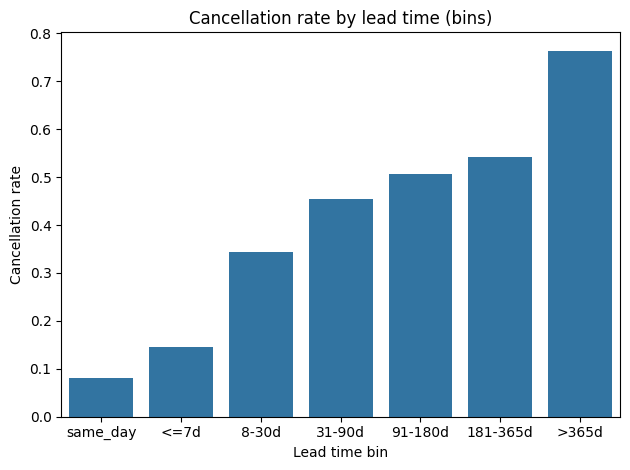

In [60]:

# Binning lead_time to analyze cancellation rate by group
bins = [-1, 0, 7, 30, 90, 180, 365, 2000]
labels = ['same_day','<=7d','8-30d','31-90d','91-180d','181-365d','>365d']
booking_df['lead_time_bin'] = pd.cut(booking_df['lead_time'].fillna(-1), bins=bins, labels=labels)
lead_cancel = booking_df.groupby('lead_time_bin')['is_canceled'].agg(['mean','count']).reset_index()
lead_cancel.to_csv(os.path.join(OUTPUT_DIR, 'leadtime_cancel_rates.csv'))

plt.figure()
sns.barplot(data=lead_cancel, x='lead_time_bin', y='mean')
plt.ylabel('Cancellation rate')
plt.xlabel('Lead time bin')
plt.title('Cancellation rate by lead time (bins)')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'cancel_rate_by_leadtime.png'))


###4.1.3 Cancellation by hotel

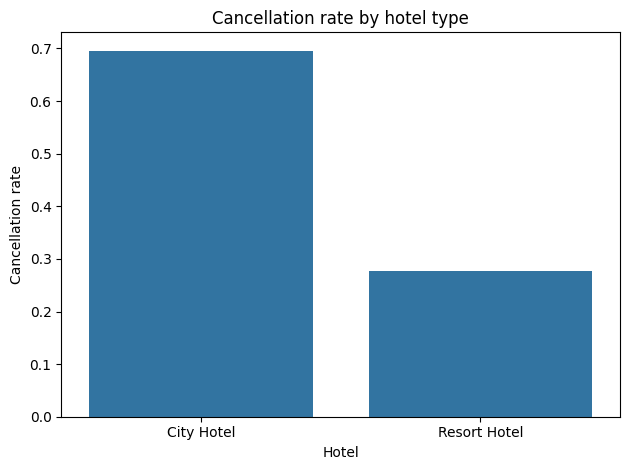

In [61]:
# Cancellation by hotel
hotel_cancel = booking_df.groupby('hotel')['is_canceled'].agg(['mean','count']).reset_index()
hotel_cancel.to_csv(os.path.join(OUTPUT_DIR, 'hotel_cancel_rates.csv'))

plt.figure()
sns.barplot(data=hotel_cancel, x='hotel', y='mean')
plt.ylabel('Cancellation rate')
plt.xlabel('Hotel')
plt.title('Cancellation rate by hotel type')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'cancel_rate_by_hotel.png'))

### 4.1.3 ADR vs cancellation

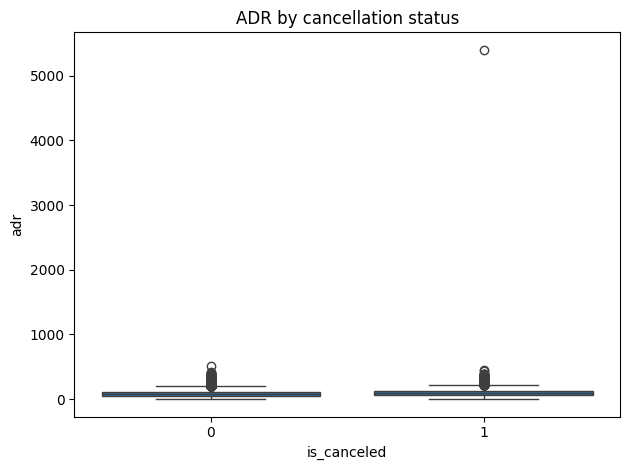

In [62]:

# ADR vs cancellation
plt.figure()
sns.boxplot(x='is_canceled', y='adr', data=booking_df[booking_df['adr'].notna()])
plt.title('ADR by cancellation status')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'adr_by_cancellation.png'))


### 4.1.4 Visualize relationship between stay duration and cancellation

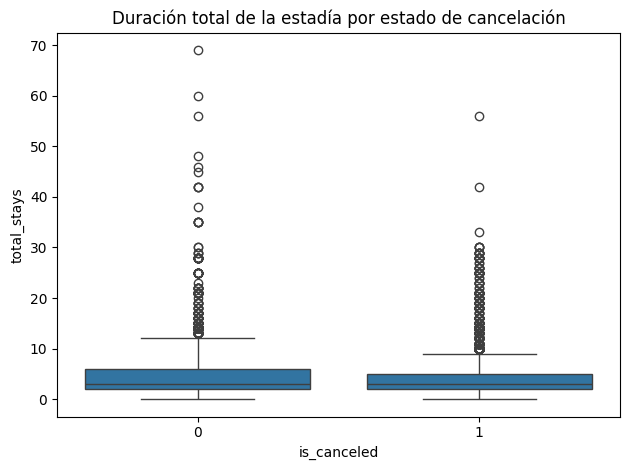

In [63]:
# 6.5 Visualizar relación entre duración y cancelación
booking_df['total_stays'] = booking_df['stays_in_week_nights'].fillna(0) + booking_df['stays_in_weekend_nights'].fillna(0)
plt.figure()
sns.boxplot(x='is_canceled', y='total_stays', data=booking_df)
plt.title('Duración total de la estadía por estado de cancelación')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'stays_by_cancellation.png'))


# 6.6 Segmentación de mercado y canal de reserva (si existen)
for col in ['market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type']:
  if col in booking_df.columns:
    out = booking_df.groupby(col)['is_canceled'].agg(['mean','count']).sort_values('count', ascending=False).reset_index()
out.to_csv(os.path.join(OUTPUT_DIR, f'{col}_cancel_rates.csv'))

## 4.2. Predictive model (Random Forest)

###4.2.1 data prep

In [64]:
features = []
# numeric features
for c in ['lead_time','adr','total_stays','stays_in_week_nights','stays_in_weekend_nights','previous_cancellations','previous_bookings_not_canceled']:
  if c in booking_df.columns:
    features.append(c)
# categorical candidates
for c in ['hotel','market_segment','distribution_channel','deposit_type','customer_type','reserved_room_type']:
  if c in booking_df.columns:
    features.append(c)
# ensure unique
features = [f for f in features if f in booking_df.columns]
print('\nFeature candidates:', features)


# Drop rows with null target and prepare X,y
df_model = booking_df.copy()
df_model = df_model[df_model['is_canceled'].notna()]
X = df_model[features]
y = df_model['is_canceled'].astype(int)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)



Feature candidates: ['lead_time', 'adr', 'total_stays', 'stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'hotel', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reserved_room_type']


###4.2.2 pipeline

In [65]:
# Preprocessing pipeline
numeric_feats = [c for c in features if booking_df[c].dtype in [np.float64, np.int64]]
cat_feats = [c for c in features if c not in numeric_feats]


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feats),
        ('cat', cat_transformer, cat_feats)
    ]
)


# Pipeline with RandomForest
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))])


###4.2.3 Fit model

In [66]:
print('\nTraining RandomForest...')
clf.fit(X_train, y_train)


Training RandomForest...


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


###4.2.4 predictions and metrics

In [67]:

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)


print('\nModel metrics (RandomForest baseline):')
print(f'Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, ROC-AUC: {roc:.3f}')




Model metrics (RandomForest baseline):
Accuracy: 0.839, Precision: 0.824, Recall: 0.775, F1: 0.799, ROC-AUC: 0.914


###4.2.5 confusion matrix and ROC curve

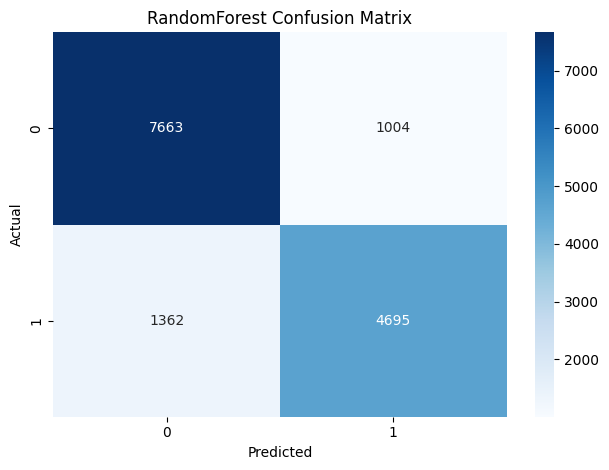

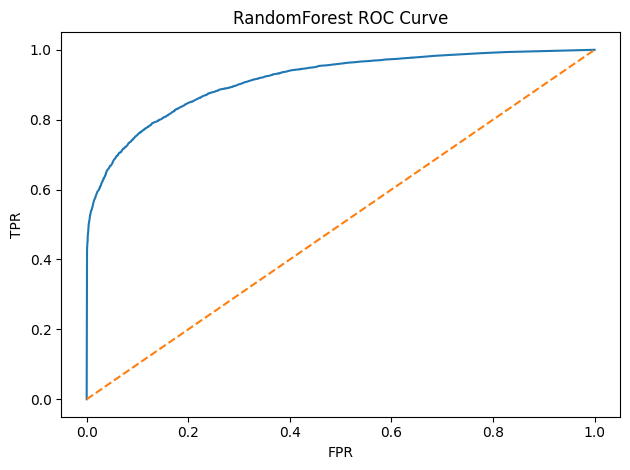

In [68]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix_rf.png'))

# ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC Curve')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'roc_rf.png'))


###4.2.6 feature importance

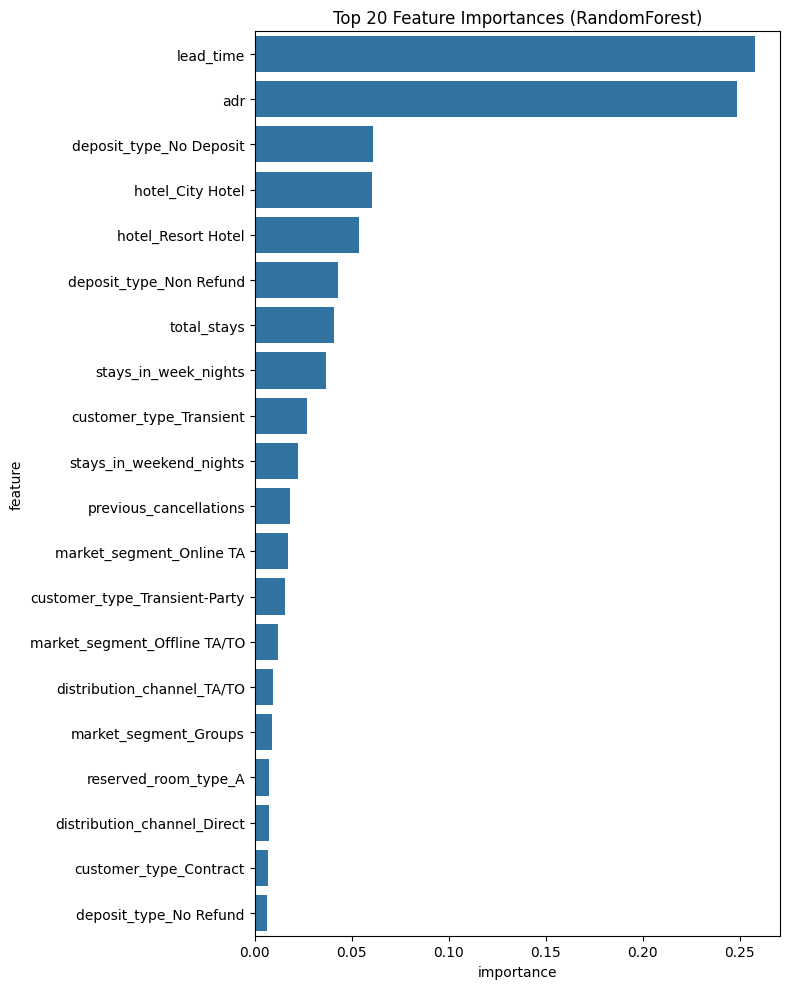

In [69]:

# Need to reconstruct column names after one-hot encoding
onehot_cols = []
if len(cat_feats) > 0:
  ohe = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
  cat_names = list(ohe.get_feature_names_out(cat_feats))
else:
  cat_names = []
all_feature_names = numeric_feats + cat_names
importances = clf.named_steps['classifier'].feature_importances_
feat_imp = pd.DataFrame({'feature': all_feature_names, 'importance': importances}).sort_values('importance', ascending=False)
# feat_imp.to_csv(OUTPUT_DIR / 'feature_importances_rf.csv', index=False)


plt.figure(figsize=(8,10))
sns.barplot(x='importance', y='feature', data=feat_imp.head(20))
plt.title('Top 20 Feature Importances (RandomForest)')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR,'feature_importances_rf.png'))

#5.Insights from the results analysis

---



---



**Summary of Key Insights from the Analysis:**

**1.** Cancellations by Lead Time

* The probability of cancellation increases as the time between booking and arrival grows.
* Especially for reservations made more than 90 days in advance, the cancellation rate rises sharply.

**2.** Differences by Hotel Type

* City hotels tend to have higher cancellation rates than resorts.
* This may be due to the fact that city reservations are often linked to business travel, which is more susceptible to changes.

**3.** Impact of Price (ADR – Average Daily Rate)

* Reservations with higher rates show higher cancellation rates.
* This suggests that more price-sensitive customers are more likely to cancel if they find better deals.

**4.** Length of Stay

* Reservations with longer stays tend to show slightly higher cancellation rates.
* Possibly because they involve greater expenses, prompting customers to reconsider before confirming.

**5.** Customer History

* Variables such as previous_cancellations and previous_bookings_not_canceled appear as relevant in the predictive model.
* They indicate that historical customer behavior is a strong predictor of their likelihood to cancel.

**6.** Variable Importance (Random Forest Model)

* Among the most influential variables for predicting cancellations are:
* lead_time
* deposit_type
* hotel
* adr
* market_segment

**In conclusion:** Cancellations are concentrated in reservations made far in advance, with higher rates, and in city hotels. They can be predicted quite effectively by considering the customer’s previous behavior and the booking channel.

In [70]:
# --------------------------
# 8. Interpretación y recomendaciones (generación automática de informe corto)
# --------------------------
# Extraer insights clave
insights = []
# Lead time insight
lt = lead_cancel.sort_values('mean', ascending=False).iloc[0]
insights.append(f"Grupo con mayor tasa de cancelación por lead_time: {lt['lead_time_bin']} con tasa={lt['mean']:.3f} (n={int(lt['count'])})")
# Hotel insight
hc = hotel_cancel.sort_values('mean', ascending=False).iloc[0]
insights.append(f"Tipo de hotel con mayor tasa de cancelación: {hc['hotel']} con tasa={hc['mean']:.3f} (n={int(hc['count'])})")
# ADR insight: comparar medias
mean_adr_cancel = booking_df.groupby('is_canceled')['adr'].mean()
insights.append(f"ADR promedio reservas canceladas: {mean_adr_cancel.loc[1]:.2f}, no canceladas: {mean_adr_cancel.loc[0]:.2f}")
# Feature importance top 5
top_features = feat_imp.head(5)
insights.append('Top features predicting cancelación: ' + ', '.join(top_features['feature'].tolist()))


# Recomendaciones (basado en hallazgos)
recommendations = [
'Implementar políticas de pre-pago o no reembolsables para reservas con alto lead_time (>90 días) en hoteles con alta tasa de cancelación.',
'Ofrecer promociones dirigidas a segmentos de mercado con alta probabilidad de cancelar (usar market_segment y distribution_channel para segmentar).',
'Implementar recordatorios y confirmaciones automáticas por e-mail/SMS a reservas con lead_time alto, incluyendo facilidades para cambiar fecha en lugar de cancelar.',
'Ajustar estrategia de precios (ADR) para segmentos con mayor cancelación; considerar seguros de cancelación o añadir coste reducido por cambio.',
'Para clientes con historial de cancelaciones previas, requerir tarjeta con pre-autorización o condiciones especiales.',
]


# Guardar informe ejecutivo sencillo en markdown
report_lines = []
report_lines.append('# Informe Ejecutivo - Taller 1 CDA')
report_lines.append('\n## Resumen de datos')
# report_lines.append(f'- Observaciones: dataset con {n_rows} filas y {n_cols} columnas.')
report_lines.append(f'- Tasa global de cancelación: {cancel_rate:.3f}')
report_lines.append('\n## Insights clave:')
for it in insights:
    report_lines.append(f'- {it}')
report_lines.append('\n## Recomendaciones:')
for r in recommendations:
    report_lines.append(f'- {r}')


with open(os.path.join(OUTPUT_DIR, 'informe_ejecutivo.md'), 'w', encoding='utf-8') as f:
    f.write('\n'.join(report_lines))